### Данные для анализа/training:
- `Expression_cells.tsv.gz` - экспрессия очищенных типов нормальных клеток
- `Annotation_cells.tsv.gz` - аннотация
- `Expression_cell_lines.tsv.gz` - экспрессия линий злокачественных клеток различных типов опухолей
- `Annotation_cell_lines.tsv.gz` - аннотация

### Данные для тестирования: - экспрессии 2 образцов крови здоровых пациентов в
- `Normal-blood-expr.tsv` экспрессии 2 образцов крови здоровых пациентов
- `LUAD-expr.tsv` - 6 образцов аденокарциномы
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### **Matrix factorization (NMF)**

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import logging

logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [194]:
data_path = '/home/iuliiasolomennikova/bostone_gene/'

### Генерация искусственных экспрессий

In [196]:
cancer_sample_annot = pd.read_csv(data_path+'Annotation_cell_lines.tsv', sep='\t', index_col=0)
cancer_expr = pd.read_csv(data_path+'Expression_cell_lines.tsv', sep='\t', index_col=0)

cells_sample_annot = pd.read_csv(data_path+'Annotation_cells.tsv', sep='\t', index_col=0)
cells_expr = pd.read_csv(data_path+'Expression_cells.tsv', sep='\t', index_col=0)

In [197]:
# Определяем коэффициенты смешивания
from sklearn.decomposition import NMF

# здоровые
num_components = 20
model_cell = NMF(n_components=num_components, random_state=42)
W_cell = model_cell.fit_transform(cells_expr.values) # разложение матрицы данных на две
H_cell = model_cell.components_ # получает матрицу H_cell, которая представляет собой коэффициенты смешивания компонент для каждой характеристики (столбца) данных.

/home/iuliiasolomennikova/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [198]:
# рак
num_components = 20
model_cancer = NMF(n_components=num_components, random_state=42)
W_cancer = model_cancer.fit_transform(cancer_expr.values)
H_cancer = model_cancer.components_


In [201]:
# Создание синтетических смесей рак
synth_expr_cancer = pd.DataFrame(np.dot(W_cancer, H_cancer), index=cancer_expr.index, columns=cancer_expr.columns)

synth_expr_cancer_ = synth_expr_cancer.T

In [203]:
# Создание синтетических смесей норм
synth_expr_cell = pd.DataFrame(np.dot(W_cell, H_cell), index=cells_expr.index, columns=cells_expr.columns)
synth_expr_cell_ = synth_expr_cell.T

In [204]:
synth_expr_cancer_.index.name = None

In [206]:
synth_expr_cancer_.index.name = 'Gene'

In [208]:
# # rename indexes in synth_expr_cell and set indexes name as Gene
synth_expr_cancer_ = synth_expr_cancer.T
synth_expr_cancer_.index.name = 'Gene'

In [241]:
# Обединение по индексам только для строк, которые присутствуют в обоих DataFrame (how='inner')

merged_df = pd.merge(synth_expr_cell_, synth_expr_cancer_, left_index=True, right_index=True, how='inner')
merged_df = merged_df.T
merged_df

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
srr_0,0.100878,0.082742,2.401926,0.771364,0.095572,0.000000,0.000122,18.686583,3.525050,0.125769,...,1.842100,10.148206,19.832276,29.455698,0.843087,9.194956,70.201136,30.114830,18.155950,0.098145
srr_1,0.089040,0.090412,2.584309,0.779045,0.102713,0.000000,0.000231,20.243516,3.770517,0.084458,...,1.066604,10.093221,20.002677,30.603485,0.838141,9.775933,68.615414,32.151871,19.386014,0.155237
srr_2,0.084052,0.080792,2.695506,0.708638,0.091989,0.017071,0.000139,18.163972,3.352268,0.084851,...,1.112165,9.241020,18.238212,27.694829,0.767007,8.748929,63.487308,28.772745,17.353282,0.115756
srr_3,0.095548,0.075194,2.180838,0.712954,0.086615,0.000000,0.000210,17.092368,3.247235,0.113316,...,1.598422,9.418825,18.384145,26.981717,0.796774,8.417576,65.188986,27.653800,16.600554,0.169011
srr_4,0.103184,0.092745,2.687377,0.832107,0.106733,0.000000,0.000193,20.389079,3.953281,0.124622,...,1.889895,10.764863,21.220012,32.079068,0.888335,10.298870,75.685656,33.584013,20.340619,0.155571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
srr_cell_229,0.107784,0.725944,10.052830,0.518541,0.087851,7.633590,0.803362,43.525650,47.319060,21.062453,...,62.887345,2.917128,10.664957,11.240333,2.681766,7.368029,88.915334,17.032205,23.660143,37.860466
srr_cell_230,0.112297,0.702887,8.788452,0.479244,0.074221,8.175726,0.784856,45.991766,48.308212,20.130967,...,56.378643,3.265545,11.095663,11.850556,2.706548,7.776558,81.853527,18.502205,24.010136,39.157296
srr_cell_231,0.088272,0.701309,6.961406,0.496244,0.044061,7.981035,0.772089,45.346109,42.539380,20.998477,...,58.917641,2.343704,9.124546,9.767099,1.798914,5.184900,107.565144,14.041303,14.837235,31.989808
srr_cell_232,0.108480,0.748991,10.907216,0.486013,0.096868,8.402011,0.834847,45.965110,48.398120,21.869268,...,60.626721,3.036781,11.194703,11.634311,2.580821,7.702134,96.255315,17.487483,24.737044,40.915132


# Cоздаем аннотацию к смеси:

- cancer_sample_annot

- cells_sample_annot

In [214]:
# normal cell
cell_cell = cells_sample_annot[['srr_h', 'general_cell_type']]

# sample id
cell_cell_id = cells_sample_annot['srr_h']

# cell type
cell_cell_type = cells_sample_annot['general_cell_type']

In [216]:
# unique cell types
unique_cell_types = cell_cell['general_cell_type'].unique()

In [217]:
cancer_cell = cancer_sample_annot[['srr_h', 'tumor_type']]

# sample id
cancer_cell_id = cancer_sample_annot['srr_h']

# type
cancer_type = cancer_sample_annot['tumor_type']

In [219]:
unique_tumors = cancer_sample_annot['tumor_type'].unique()

In [239]:
# соединим датасет srr_h
merged_id = pd.concat([cell_cell_id, cancer_cell_id], axis=0)

In [242]:
# соединим датасет cell type
merged_cell = pd.concat([cell_cell_type, cancer_type], axis=0)

In [222]:
y_merged_type = pd.concat([merged_id, merged_cell], axis=1)

In [254]:
y_merged_type_ = y_merged_type.rename(columns={0: 'cell_type'})


,cell_type
srr_h,
srr_0,B_cells
srr_1,B_cells
srr_2,B_cells
srr_3,B_cells
srr_4,B_cells


# Cоздание x, y

In [243]:
x = merged_df.iloc[:, :]
y = y_merged_type_['cell_type']

In [244]:
x.shape

(1222, 20062)

In [245]:
y.shape

(1222,)

In [231]:
# Get the gene names and cell type labels
gene_names = x.columns
cell_types = y.unique()

In [263]:
# Encode the cell type labels as integers
cell_type_mapping = {cell_type: i for i, cell_type in enumerate(cell_types)}
y_merged_type_['cell_type_encoded'] = y_merged_type_['cell_type'].map(cell_type_mapping)

In [250]:
y_merged_type = y_merged_type.set_index('srr_h')

In [251]:
y_merged_type_.drop('srr_h', axis=1, inplace=True)

In [266]:
X = x.values
Y = y_merged_type_['cell_type_encoded'].values

In [267]:
# Set the number of components (cell types)
n_components = len(cell_types)

nmf = NMF(n_components=n_components, random_state=0)
nmf.fit(X)

/home/iuliiasolomennikova/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=18, random_state=0)

In [282]:
# Get the cell type proportion matrix (W matrix)
cell_type_proportions = nmf.transform(X)

# Normalize the proportions for each sample
cell_type_proportions_normalized = cell_type_proportions / cell_type_proportions.sum(axis=1, keepdims=True)

predicted_proportions = pd.DataFrame(cell_type_proportions_normalized, columns=cell_types)

predicted_proportions.index = y_merged_type_.index

In [283]:
predicted_proportions

,B_cells,CD4_T_cells,CD8_T_cells,Monocytes,Neutrophils,NK_cells,Fibroblasts,Macrophages,Endothelium,T_cells,BRCA,LUAD,PAAD,SKCM,OVCA,DLBCL,Undefined,NSCLC
srr_h,,,,,,,,,,,,,,,,,,
srr_0,0.241303,0.229749,0.389951,0.0,0.000085,0.009545,0.0,0.001913,0.001786,0.101817,0.001592,0.000000,0.000000,0.000139,0.000000,0.0,0.0,0.022119
srr_1,0.226157,0.197359,0.435258,0.0,0.000456,0.010039,0.0,0.001370,0.000338,0.083010,0.002200,0.000000,0.000000,0.000000,0.000009,0.0,0.0,0.043803
srr_2,0.238116,0.200692,0.420366,0.0,0.000322,0.009220,0.0,0.001255,0.000573,0.088361,0.002104,0.000000,0.000000,0.000000,0.000009,0.0,0.0,0.038983
srr_3,0.248994,0.219074,0.385974,0.0,0.000000,0.012354,0.0,0.001976,0.002002,0.106388,0.001573,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.021664
srr_4,0.226862,0.231401,0.412625,0.0,0.000386,0.010126,0.0,0.002042,0.002142,0.087792,0.001741,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.024883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
srr_cell_229,0.826823,0.076317,0.061555,0.0,0.023116,0.000000,0.0,0.000000,0.000702,0.000000,0.000000,0.000109,0.000000,0.000000,0.000912,0.0,0.0,0.010466
srr_cell_230,0.803176,0.078664,0.079456,0.0,0.023125,0.000000,0.0,0.000000,0.000783,0.000000,0.000000,0.000108,0.000000,0.000000,0.000798,0.0,0.0,0.013889
srr_cell_231,0.831034,0.096279,0.042522,0.0,0.023711,0.000000,0.0,0.000000,0.001013,0.000000,0.000000,0.000107,0.000024,0.000000,0.000451,0.0,0.0,0.004858


# Метрики:

Some commonly used metrics for evaluating the performance of clustering algorithms include:

- Adjusted Rand Index (ARI): measures the similarity between the predicted and actual cluster assignments, adjusting for chance.

- Silhouette Score: measures how well each sample fits into its assigned cluster, taking into account both the distance to its own cluster centroid and the distance to the nearest neighboring cluster centroid.

- Homogeneity, Completeness, and V-Measure: measures the purity of the predicted clusters (Homogeneity), the completeness of the predicted clusters (Completeness), and the harmonic mean of Homogeneity and Completeness (V-Measure).

### Compare the predicted cluster labels with the true cell type labels:

In [334]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_completeness_v_measure

# ARI
ari = adjusted_rand_score(y_merged_type_['cell_type'], predicted_proportions.idxmax(axis=1))

# Silhouette Score
silhouette = silhouette_score(X, predicted_proportions.idxmax(axis=1))

# Homogeneity, Completeness, and V-Measure
h, c, v = homogeneity_completeness_v_measure(y_merged_type_['cell_type'], predicted_proportions.idxmax(axis=1))

print("ARI:", ari)
print("Silhouette Score:", silhouette)
print("Homogeneity:", h)
print("Completeness:", c)
print("V-Measure:", v)


ARI: 0.3065923245011373
Silhouette Score: -0.03488596325999201
Homogeneity: 0.2686498941908055
Completeness: 0.45645307772529653
V-Measure: 0.3382307776505897


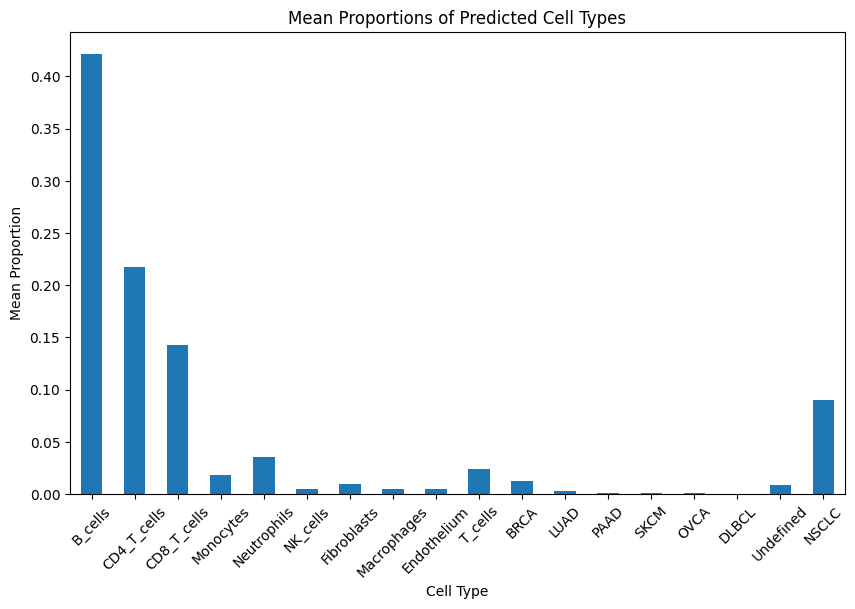

In [335]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
predicted_proportions.mean().plot(kind='bar')
plt.xlabel('Cell Type')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportions of Predicted Cell Types')
plt.xticks(rotation=45)
plt.show()


-  ARI of 0.3066 suggests a moderate agreement between the predicted cell type proportions and the actual cell type labels.

ARI value ranges from -1 to 1, where 1 indicates perfect clustering agreement and 0 indicates clustering results that are no better than random


- Silhouette Score of -0.0349 suggests that the clusters are overlapping and the sample assignments are not well-defined. 

The score ranges from -1 to 1, where values close to 1 indicate well-separated clusters, values close to 0 indicate overlapping clusters


-  Homogeneity of 0.2686, Completeness of 0.4565, and V-Measure of 0.3382 indicate that the predicted clusters are moderately homogeneous and complete.

Homogeneity, Completeness, and V-Measure: Homogeneity measures the purity of the predicted clusters, Completeness measures the completeness of the predicted clusters, and V-Measure is the harmonic mean of Homogeneity and Completeness. These metrics range from 0 to 1

Based on these metrics, it seems that the NMF algorithm's predictions for cell type proportions are not very accurate or distinct. 

In [306]:
mean_proportions = predicted_proportions.mean()

std_proportions = predicted_proportions.std()

print("Mean Proportions:")
print(mean_proportions)
print("\nStandard Deviations:")
print(std_proportions)


Mean Proportions:
B_cells        0.421405
CD4_T_cells    0.217203
CD8_T_cells    0.142634
Monocytes      0.018604
Neutrophils    0.035210
NK_cells       0.004503
Fibroblasts    0.009702
Macrophages    0.004553
Endothelium    0.005208
T_cells        0.023656
BRCA           0.012749
LUAD           0.003118
PAAD           0.000776
SKCM           0.001021
OVCA           0.000860
DLBCL          0.000460
Undefined      0.008294
NSCLC          0.090045
dtype: float64

Standard Deviations:
B_cells        0.380176
CD4_T_cells    0.231221
CD8_T_cells    0.186859
Monocytes      0.070591
Neutrophils    0.065951
NK_cells       0.021522
Fibroblasts    0.060871
Macrophages    0.012313
Endothelium    0.010964
T_cells        0.062242
BRCA           0.026574
LUAD           0.019187
PAAD           0.002646
SKCM           0.012990
OVCA           0.001505
DLBCL          0.001657
Undefined      0.012418
NSCLC          0.118799
dtype: float64


# Prediction on test data:

In [285]:
LUAD = pd.read_csv(data_path + 'LUAD-expr.tsv', sep='\t', index_col=0) 
NORMAL = pd.read_csv(data_path + 'Normal-blood-expr.tsv', sep='\t', index_col=0)

In [286]:
LUAD=LUAD.T
NORMAL=NORMAL.T

### 6 образцов аденокарциномы:

In [338]:
LUAD_transformed = nmf.transform(LUAD.values)

LUAD_proportions_normalized = LUAD_transformed / LUAD_transformed.sum(axis=1, keepdims=True)

predicted_proportions_new = pd.DataFrame(LUAD_proportions_normalized, columns=cell_types)

predicted_proportions_new.index = LUAD.index

predicted_proportions_new

,B_cells,CD4_T_cells,CD8_T_cells,Monocytes,Neutrophils,NK_cells,Fibroblasts,Macrophages,Endothelium,T_cells,BRCA,LUAD,PAAD,SKCM,OVCA,DLBCL,Undefined,NSCLC
VIC-020-CL,0.643074,0.059894,0.184451,0.000263,0.013641,0.024019,0.003356,0.000838,0.000000,0.054394,0.006460,0.001831,0.000104,0.006353,0.000774,0.000547,0.000000,0.000000
VIC-025-CL,0.713480,0.082260,0.113382,0.003133,0.012728,0.000410,0.024409,0.000556,0.000371,0.036050,0.000535,0.001479,0.000082,0.000000,0.000960,0.000484,0.000000,0.009680
VIC-026-CL,0.870677,0.000000,0.016459,0.000000,0.003144,0.082703,0.002142,0.000000,0.000000,0.016415,0.001097,0.000000,0.000000,0.006798,0.000379,0.000187,0.000000,0.000000
VIC-031-CL,0.904348,0.000000,0.034583,0.000000,0.010810,0.038924,0.001400,0.000000,0.000000,0.000000,0.000682,0.000000,0.000000,0.008547,0.000451,0.000257,0.000000,0.000000
VIC-033-CL,0.244996,0.482464,0.152108,0.000000,0.061538,0.001135,0.005894,0.001908,0.001270,0.017177,0.007920,0.001631,0.000000,0.000581,0.000972,0.000015,0.005987,0.014404
VIC-034-CL,0.944664,0.013903,0.016964,0.000296,0.002285,0.000170,0.000680,0.000616,0.000000,0.015052,0.001524,0.000956,0.000000,0.000000,0.000187,0.000089,0.001012,0.001600


### Internal evaluation metrics that assess the quality of the clustering or grouping of samples:

In [296]:
# mean and std of the predicted proportions for each cell type
mean_proportions = predicted_proportions_new.mean()
std_proportions = predicted_proportions_new.std()

for cell_type in cell_types:
    print("Cell Type:", cell_type)
    print("Mean Proportion:", mean_proportions[cell_type])
    print("Standard Deviation:", std_proportions[cell_type])
    print()


Cell Type: B_cells
Mean Proportion: 0.720206364512762
Standard Deviation: 0.2602882920652414

Cell Type: CD4_T_cells
Mean Proportion: 0.1064201851762484
Standard Deviation: 0.1872788848803902

Cell Type: CD8_T_cells
Mean Proportion: 0.08632470470006953
Standard Deviation: 0.07356320138186943

Cell Type: Monocytes
Mean Proportion: 0.0006153712702977919
Standard Deviation: 0.001241106009862558

Cell Type: Neutrophils
Mean Proportion: 0.017357698765643803
Standard Deviation: 0.022177807252694318

Cell Type: NK_cells
Mean Proportion: 0.024560201751381867
Standard Deviation: 0.03260078527666482

Cell Type: Fibroblasts
Mean Proportion: 0.0063133200116624495
Standard Deviation: 0.00905160458607566

Cell Type: Macrophages
Mean Proportion: 0.0006530880306679621
Standard Deviation: 0.0007031817391541106

Cell Type: Endothelium
Mean Proportion: 0.00027359053971058047
Standard Deviation: 0.0005103583928382727

Cell Type: T_cells
Mean Proportion: 0.02318121951662878
Standard Deviation: 0.0191054765

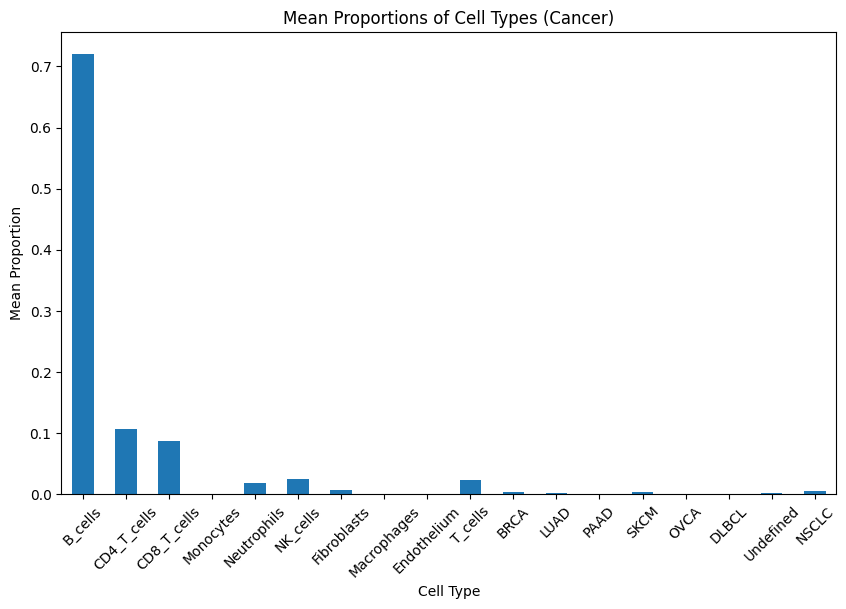

In [339]:
plt.figure(figsize=(10, 6))
predicted_proportions_new.mean().plot(kind='bar')
plt.xlabel('Cell Type')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportions of Cell Types (Cancer)')
plt.xticks(rotation=45)
plt.show()

### экспрессии 2 образцов крови здоровых пациентов:

In [325]:
NORMAL_subset = NORMAL[gene_names]
NORMAL_subset

Gene,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
SampleA,16.109280,0.038071,6.472901,1.114301,0.262137,0.063920,0.035203,50.120966,16.019493,0.0,...,3.277652,2.35758,3.92542,32.98624,0.322027,6.150366,323.455250,43.731142,27.138971,6.894973
SampleB,19.539665,0.046603,7.923150,0.412397,0.113965,0.018244,0.020125,41.729762,10.303349,0.0,...,2.135265,1.79806,3.32309,23.30800,0.315961,4.405854,258.211453,31.149349,22.258908,5.596890


In [326]:
NORMAL_transformed = nmf.transform(NORMAL_subset.values)

NORMAL_proportions_normalized = NORMAL_transformed / NORMAL_transformed.sum(axis=1, keepdims=True)

predicted_proportions_new = pd.DataFrame(NORMAL_proportions_normalized, columns=cell_types)

predicted_proportions_new.index = NORMAL_subset.index

predicted_proportions_new

,B_cells,CD4_T_cells,CD8_T_cells,Monocytes,Neutrophils,NK_cells,Fibroblasts,Macrophages,Endothelium,T_cells,BRCA,LUAD,PAAD,SKCM,OVCA,DLBCL,Undefined,NSCLC
SampleA,0.402593,0.089918,0.315417,0.0,0.013604,0.000000,0.021240,0.004044,0.000000,0.092761,0.017723,0.000672,0.000027,0.000188,0.000244,0.0,0.0,0.041569
SampleB,0.299645,0.128535,0.397951,0.0,0.011785,0.000201,0.030049,0.003151,0.001395,0.080013,0.019272,0.000000,0.000000,0.000173,0.000363,0.0,0.0,0.027468


In [327]:
# mean and std of the predicted proportions for each cell type
mean_proportions = predicted_proportions_new.mean()
std_proportions = predicted_proportions_new.std()

for cell_type in cell_types:
    print("Cell Type:", cell_type)
    print("Mean Proportion:", mean_proportions[cell_type])
    print("Standard Deviation:", std_proportions[cell_type])
    print()

Cell Type: B_cells
Mean Proportion: 0.3511188078394596
Standard Deviation: 0.07279511090122799

Cell Type: CD4_T_cells
Mean Proportion: 0.10922655158506793
Standard Deviation: 0.027305763553125795

Cell Type: CD8_T_cells
Mean Proportion: 0.356684280463925
Standard Deviation: 0.05836020632354139

Cell Type: Monocytes
Mean Proportion: 0.0
Standard Deviation: 0.0

Cell Type: Neutrophils
Mean Proportion: 0.01269429473029381
Standard Deviation: 0.0012860413157685698

Cell Type: NK_cells
Mean Proportion: 0.00010047967506464695
Standard Deviation: 0.0001420997192192654

Cell Type: Fibroblasts
Mean Proportion: 0.025644557526784142
Standard Deviation: 0.006229095194954006

Cell Type: Macrophages
Mean Proportion: 0.0035974235471963214
Standard Deviation: 0.0006310100796793895

Cell Type: Endothelium
Mean Proportion: 0.0006973204028820181
Standard Deviation: 0.0009861599710752206

Cell Type: T_cells
Mean Proportion: 0.08638718293812335
Standard Deviation: 0.009014346103908423

Cell Type: BRCA
Mea

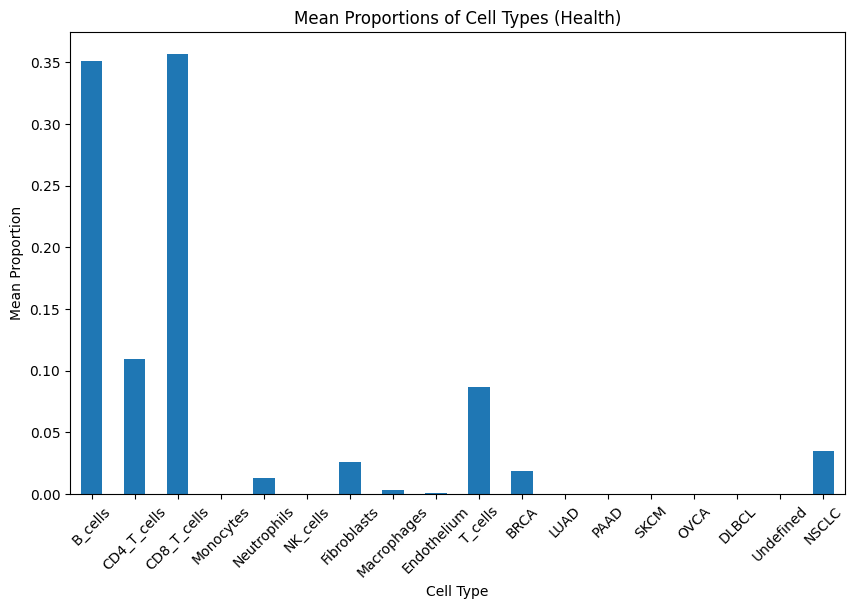

In [337]:
plt.figure(figsize=(10, 6))
predicted_proportions_new.mean().plot(kind='bar')
plt.xlabel('Cell Type')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportions of Cell Types (Health)')
plt.xticks(rotation=45)
plt.show()
